In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure

In [2]:
csv_file_path = "Flight_Price_Prediction.csv"
df = pd.read_csv(csv_file_path)

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df = df.drop("Unnamed: 0", axis = 1)


In [5]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [7]:
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [15]:
df.corr(numeric_only =True)

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [18]:
figure(figsize=(8,6), dpi=80)
plt.scatter(df['price'], df['duration'])

#label
plt.xlabel("Price")
plt.ylabel("Duration")
plt.title("Scatter Price vs Duration")

plt.scatter(df[,\

SyntaxError: invalid syntax (445238070.py, line 9)

Objective are the following

Hypothesis-based EDA:

Does the price vary with Airlines for the same source_city to destination_city?

How is the price affected when tickets are bought just 1 or 2 days before departure?

Does the ticket price change based on the departure time and arrival time?

Check the distribution of the Price variable and remove outliers to create a new dataset.

Build a Linear regression Model with all the features (m1), select only the top 5 features using the model coefficient, and rebuild the regression model (m2) again using Statsmodels. Observe if there are any differences between the two models in Adjusted-R2 and R2. 

Build a Linear Regression model using Scikit learn and Statsmodels; compare the results

Analyze the impact of airlines, time of purchase, and departure/arrival time on ticket prices.


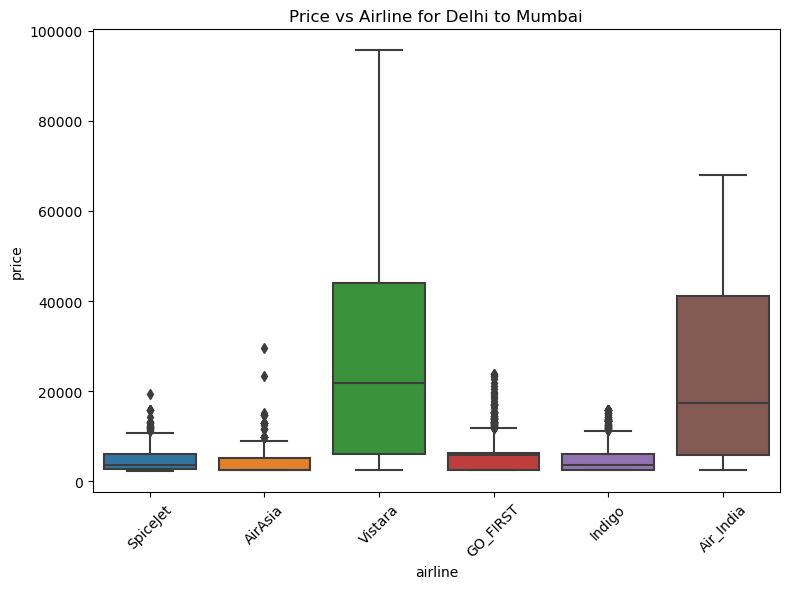

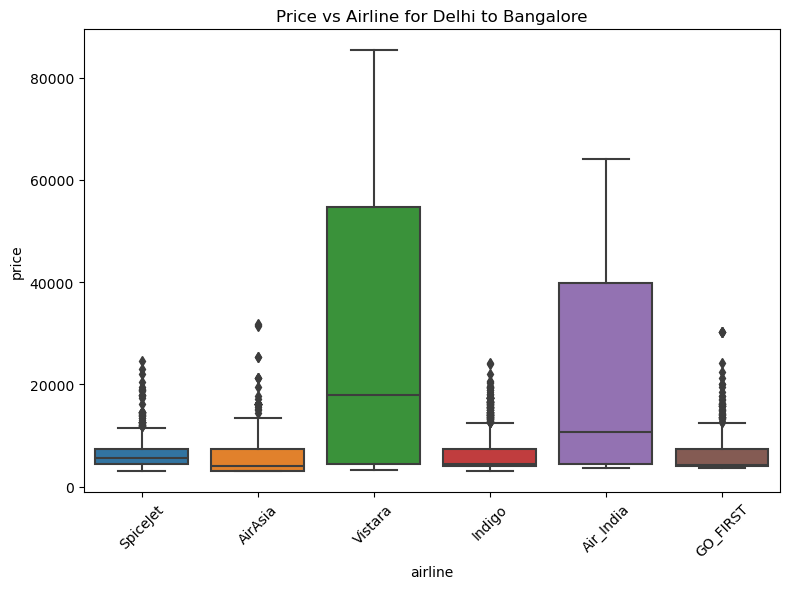

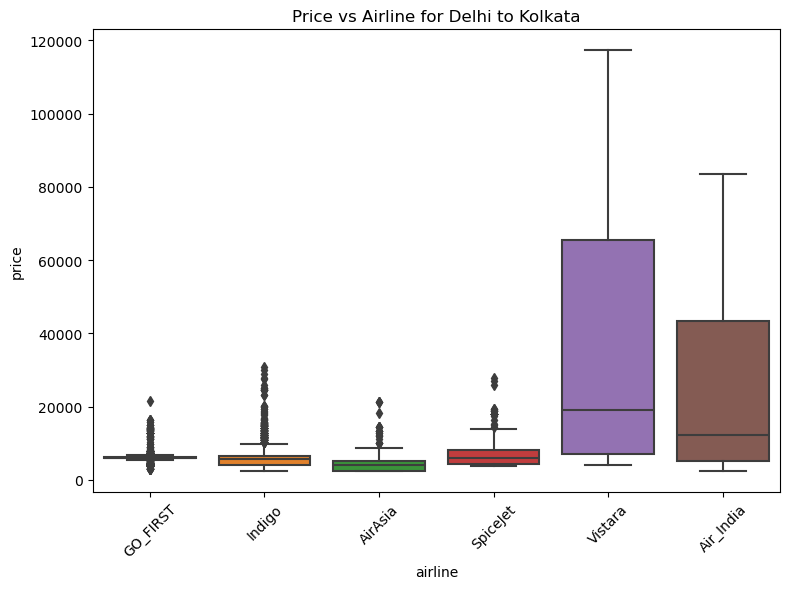

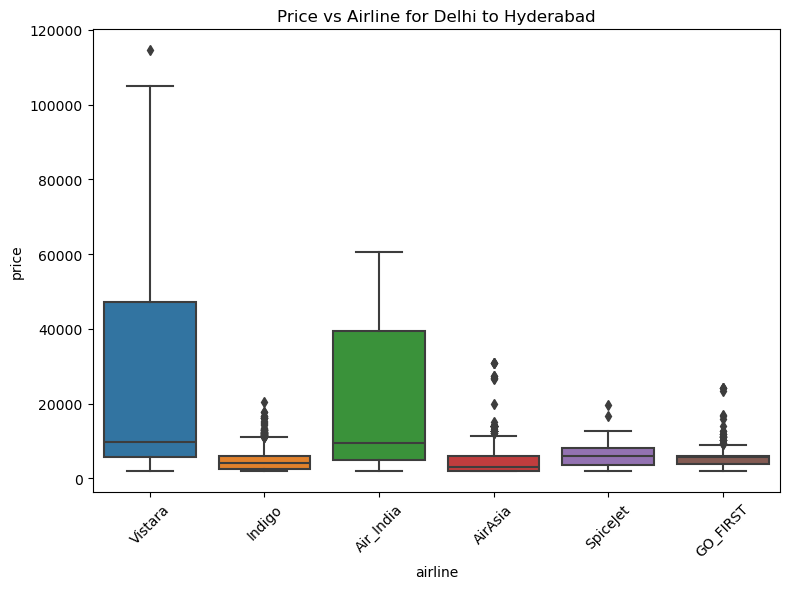

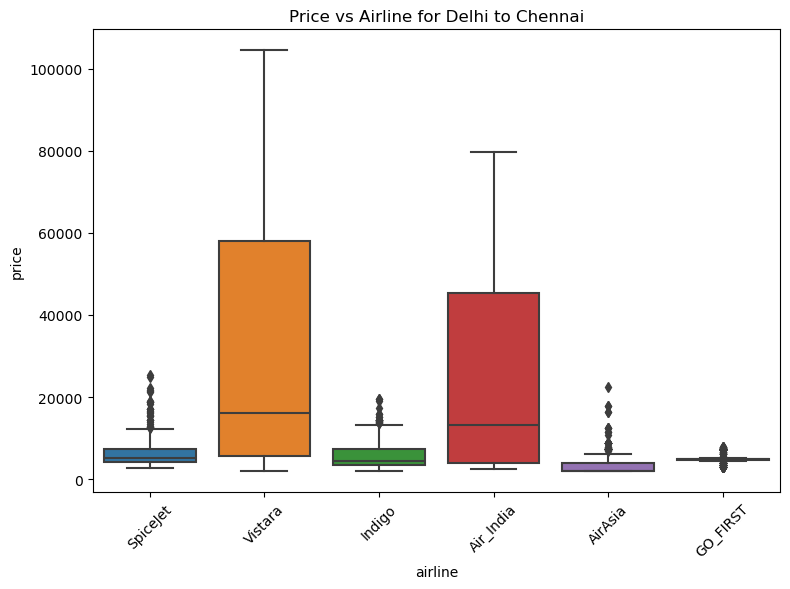

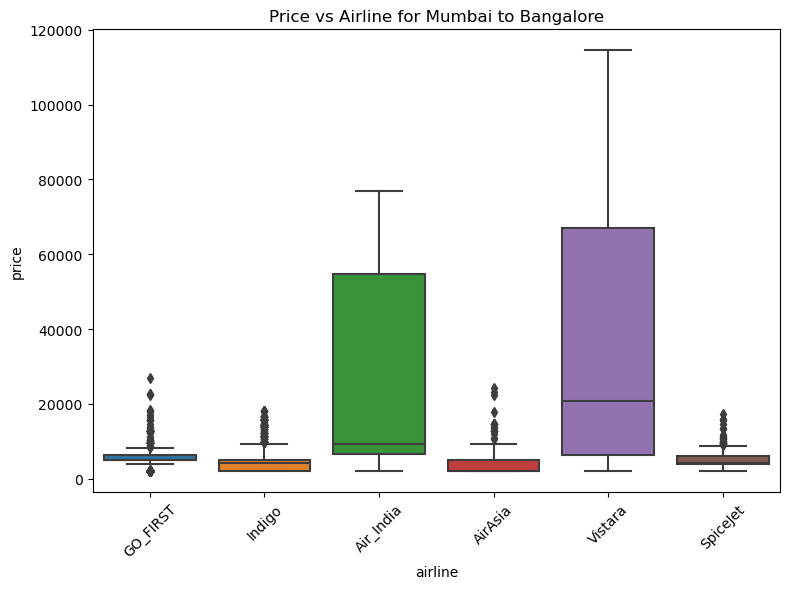

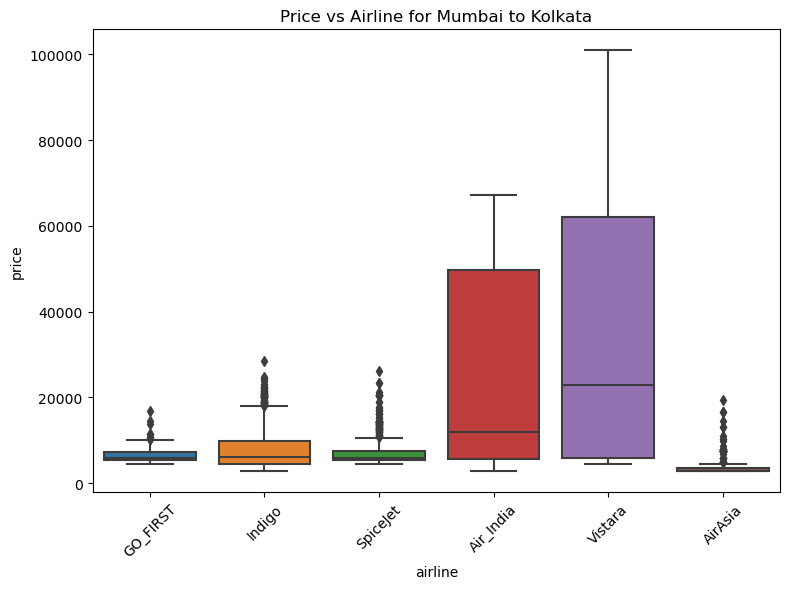

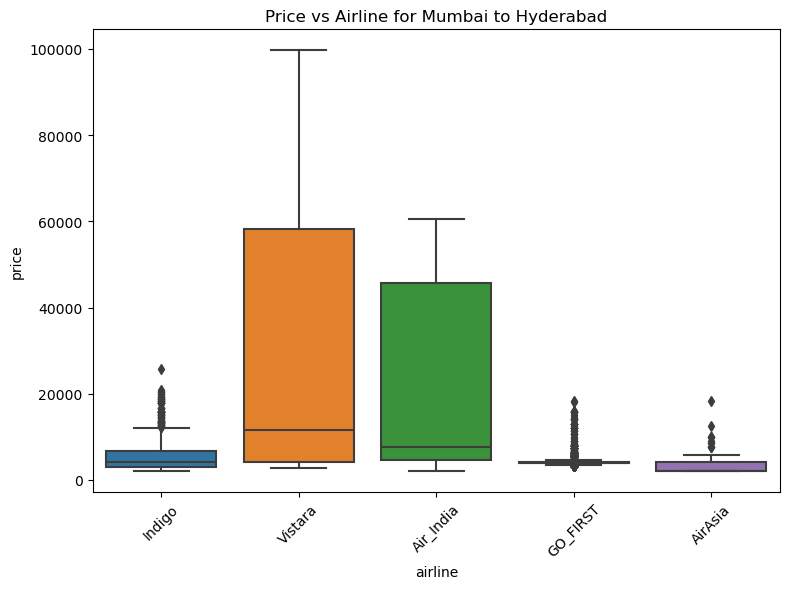

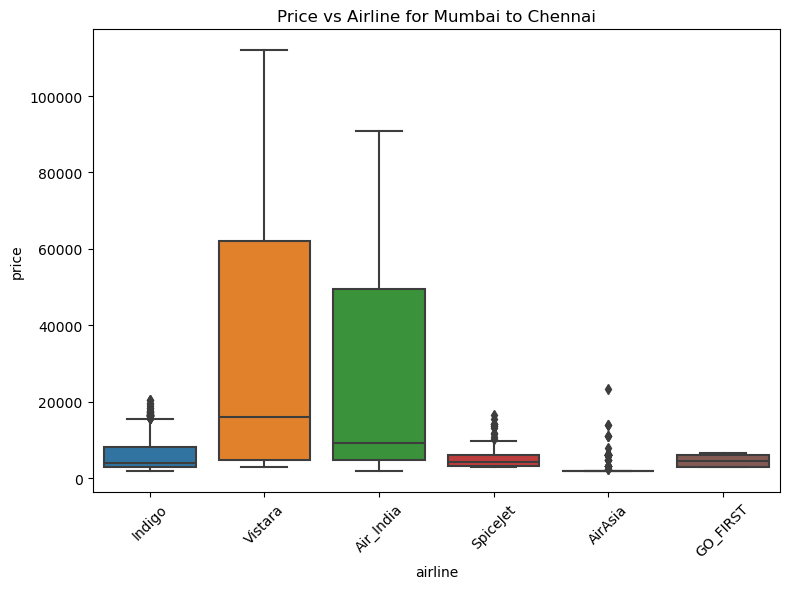

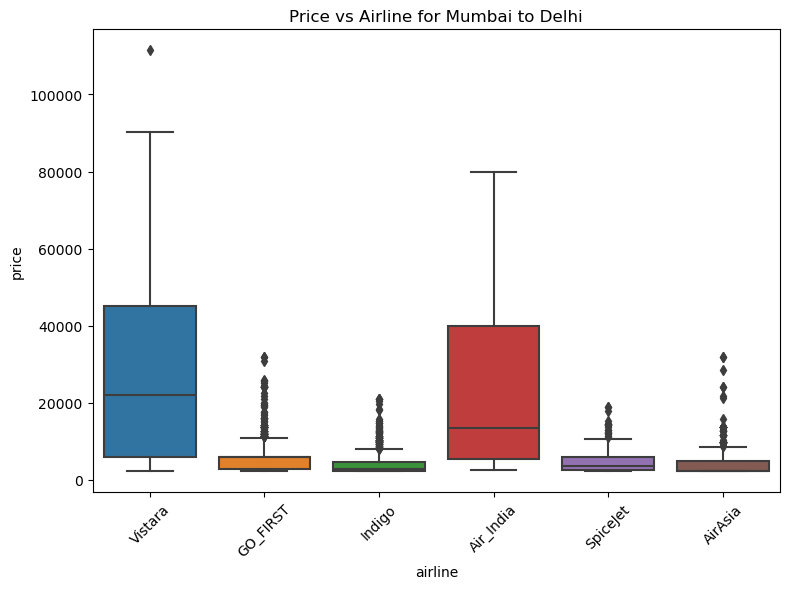

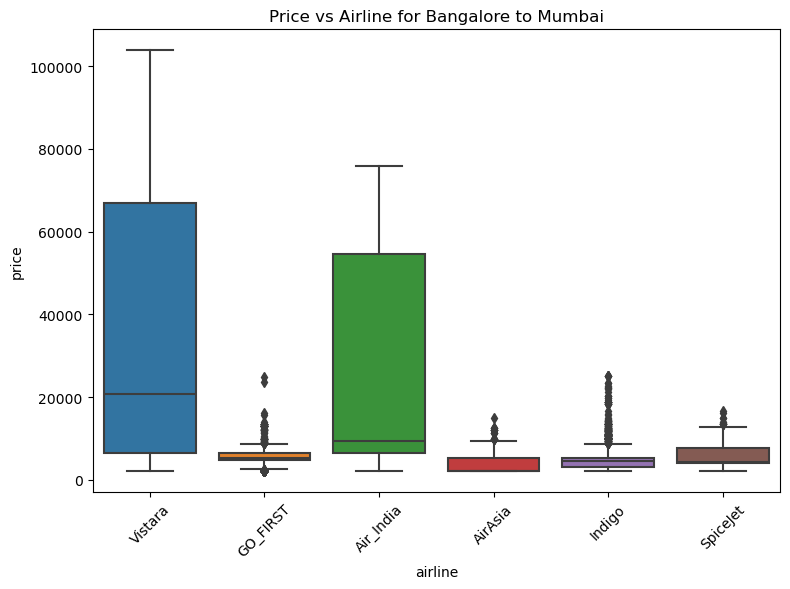

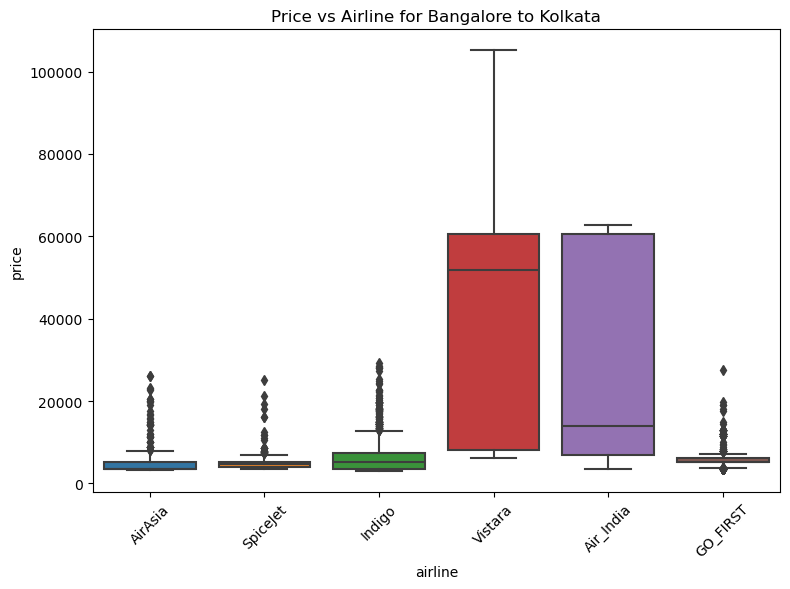

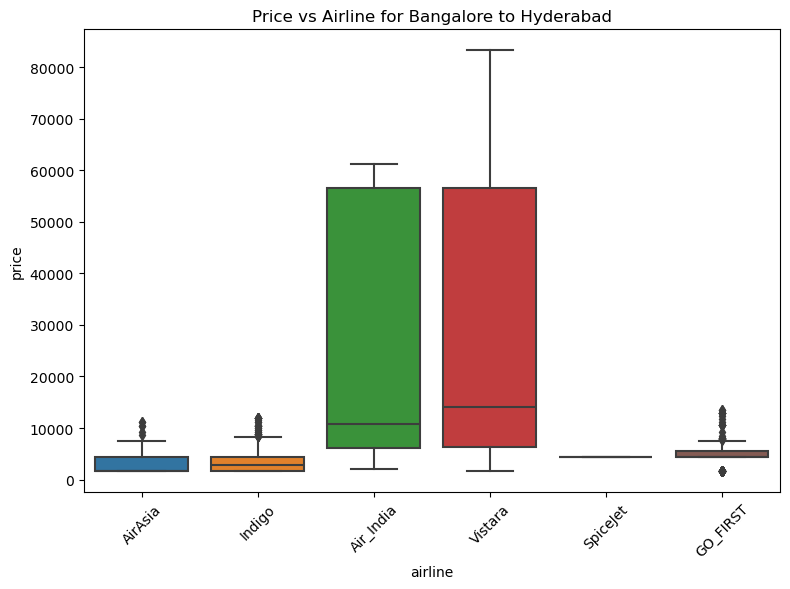

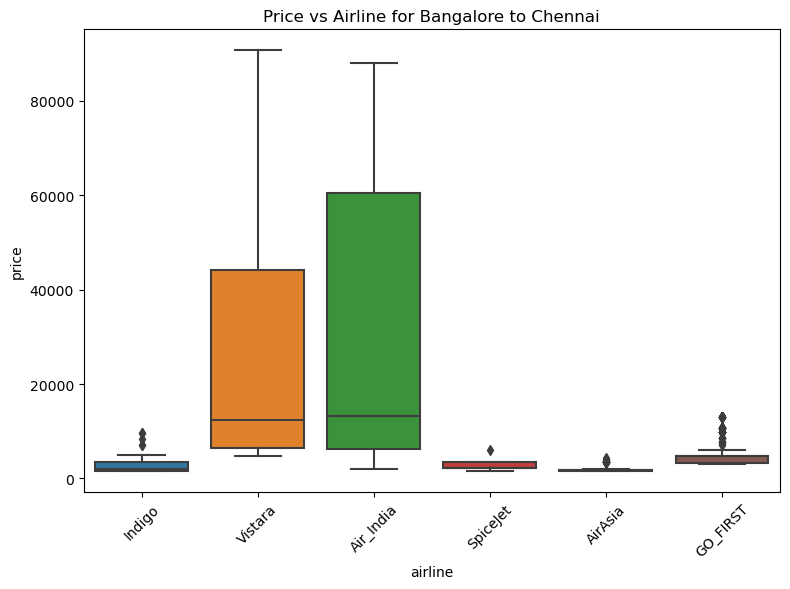

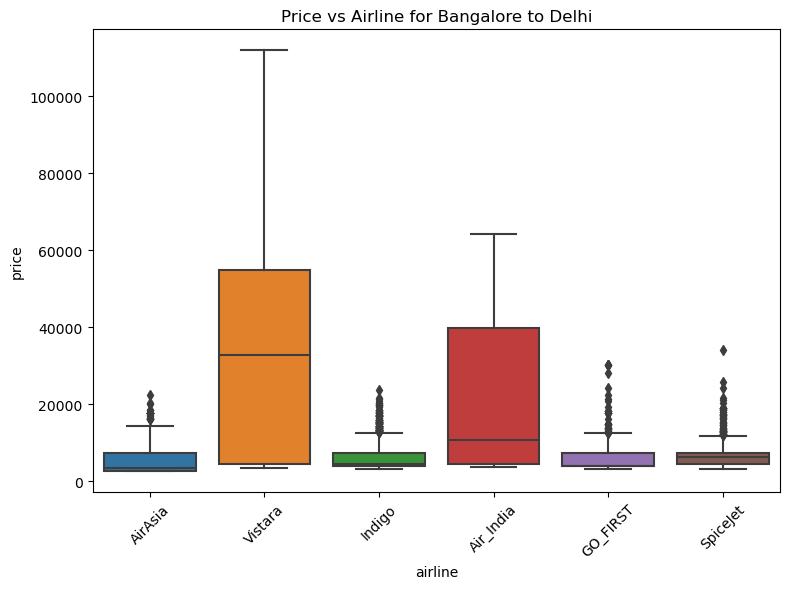

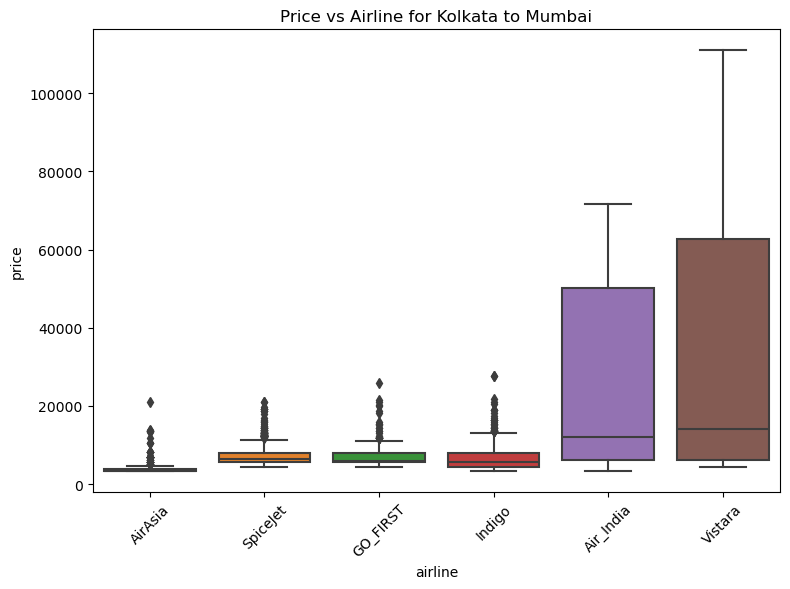

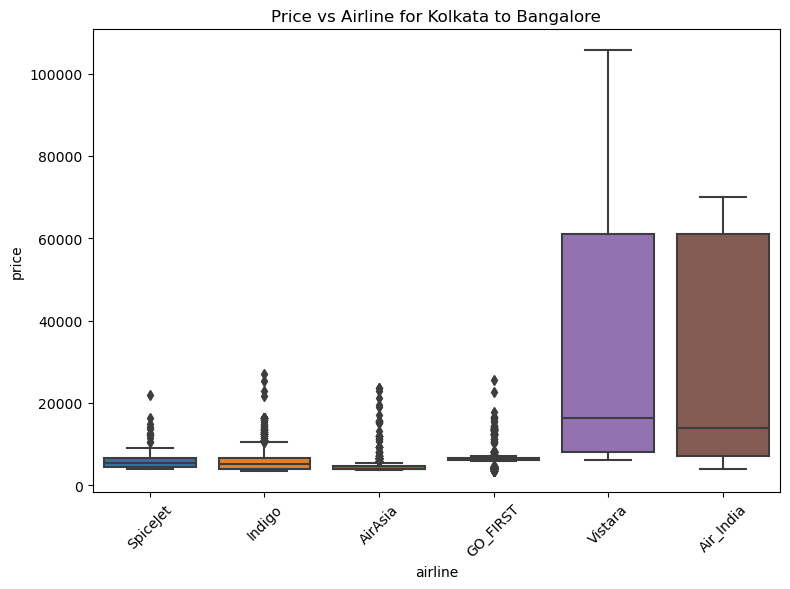

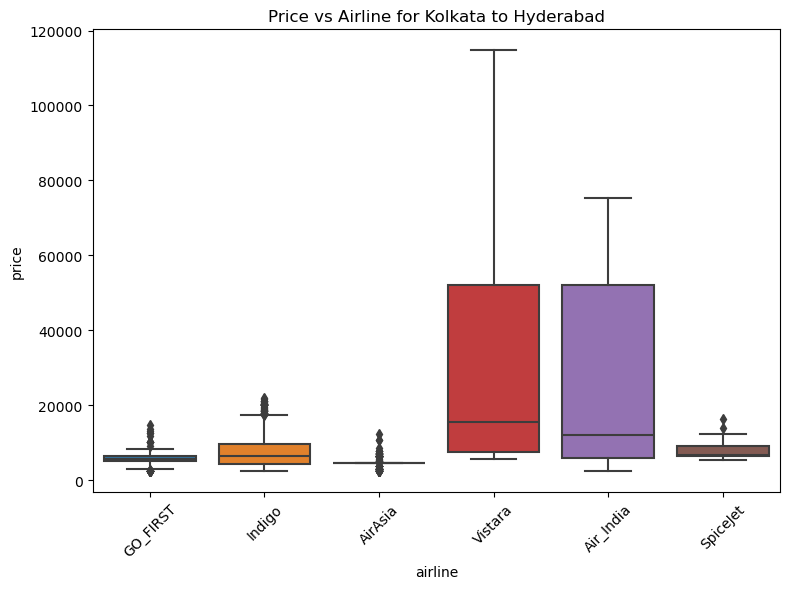

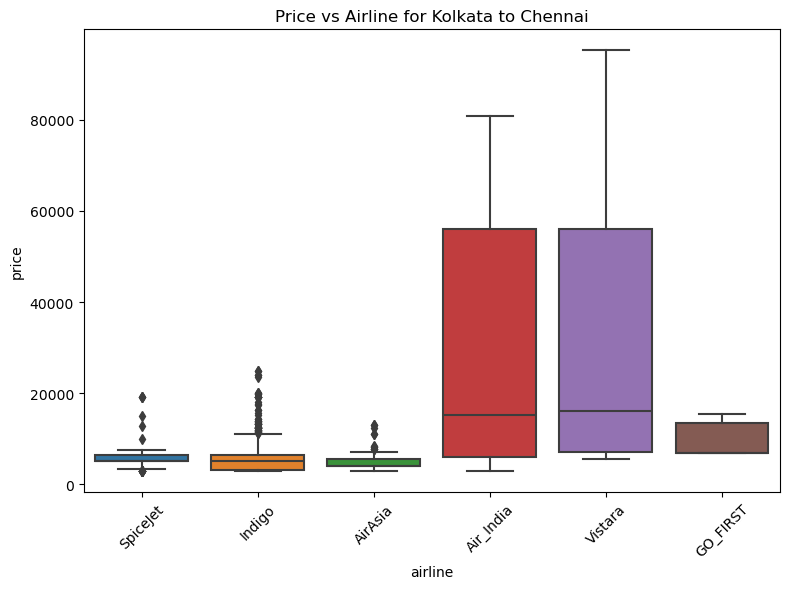

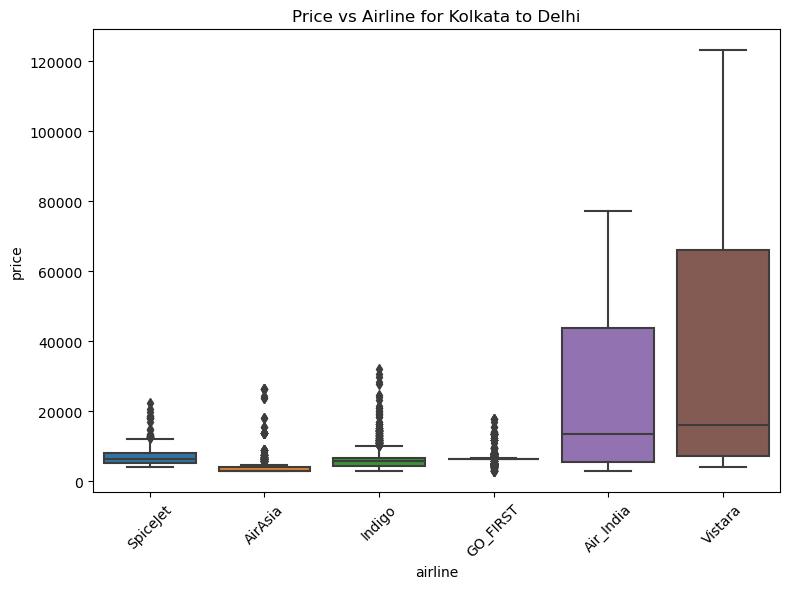

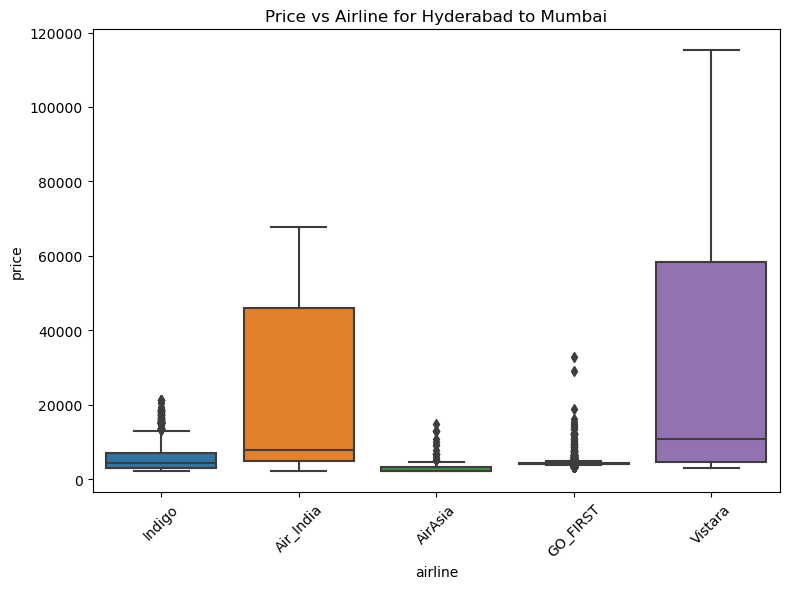

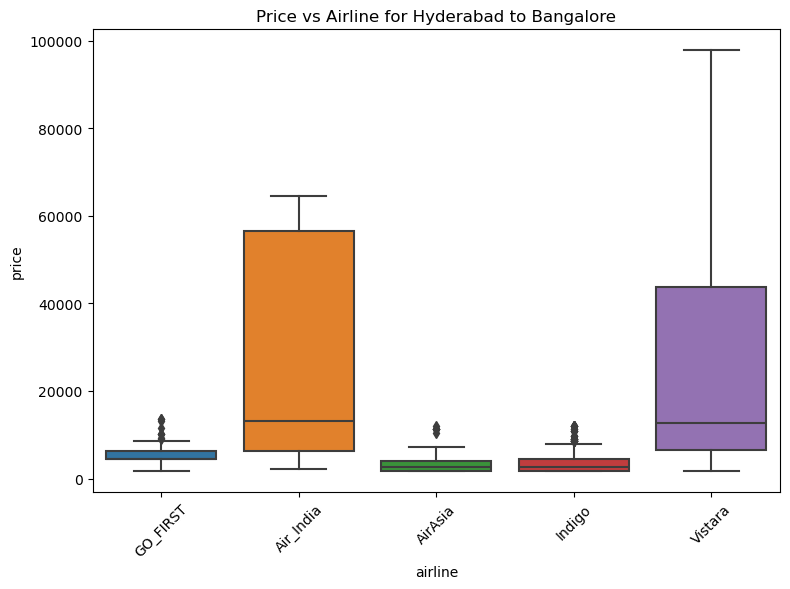

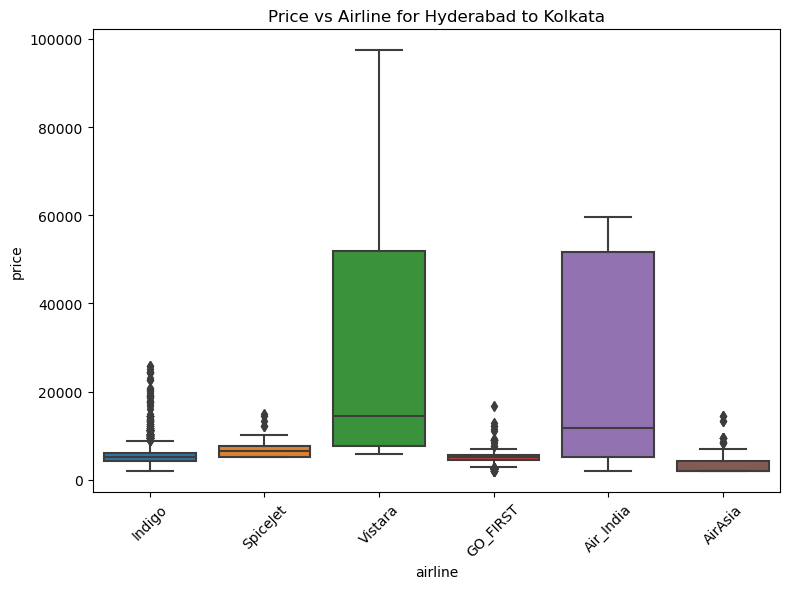

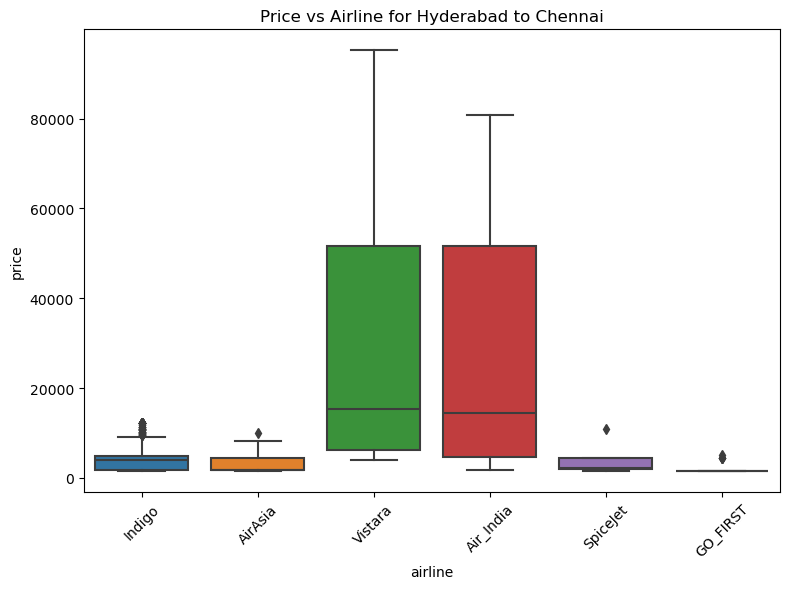

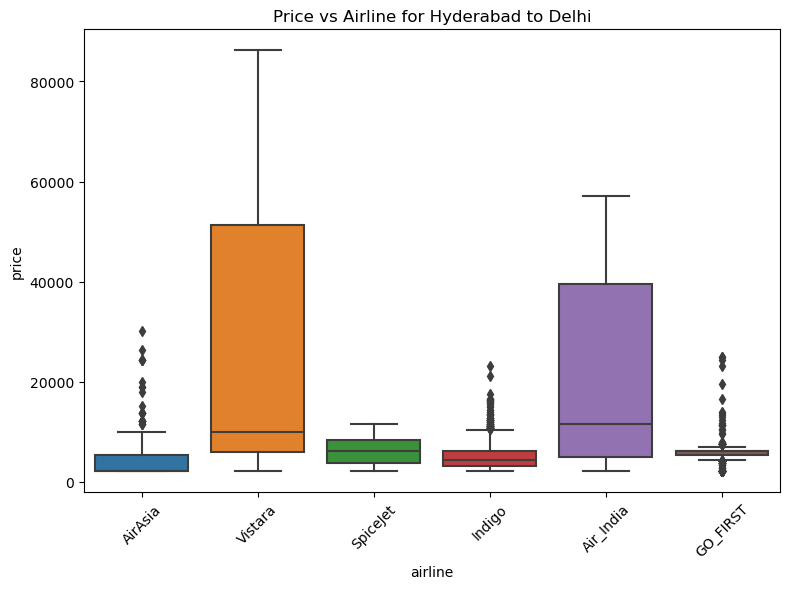

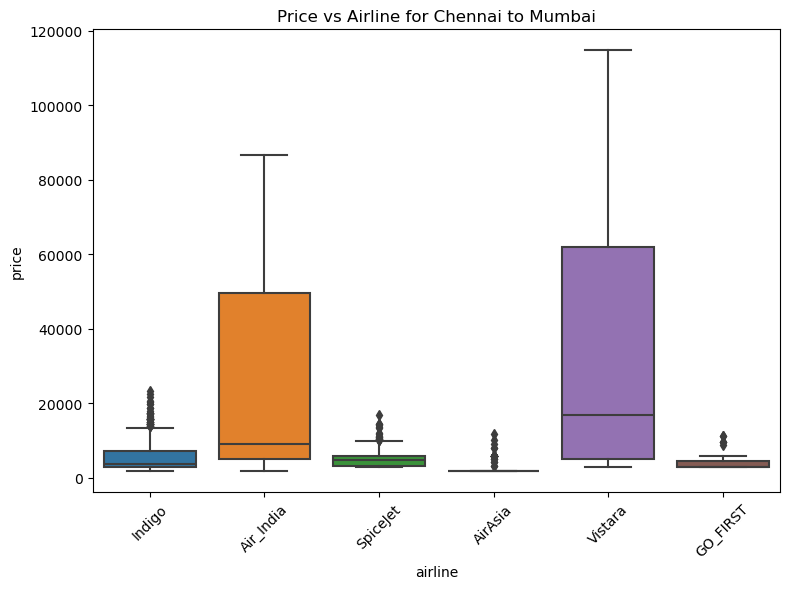

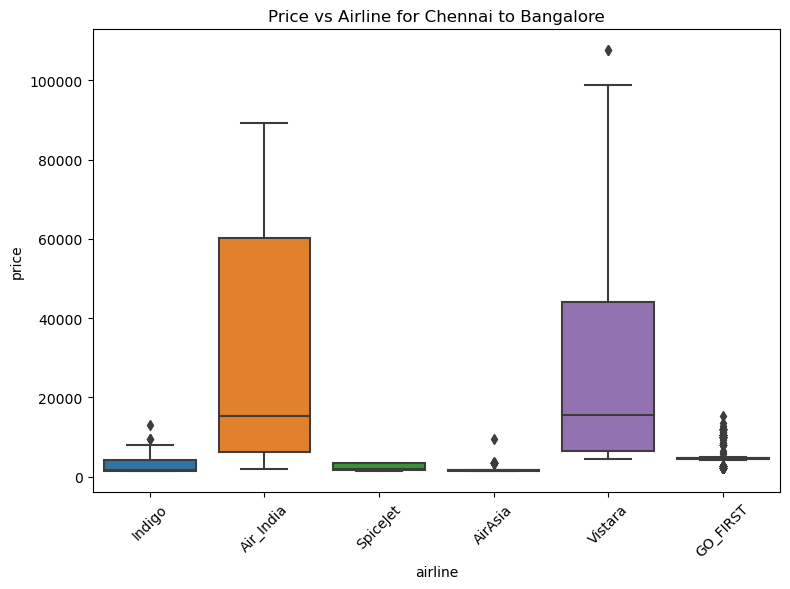

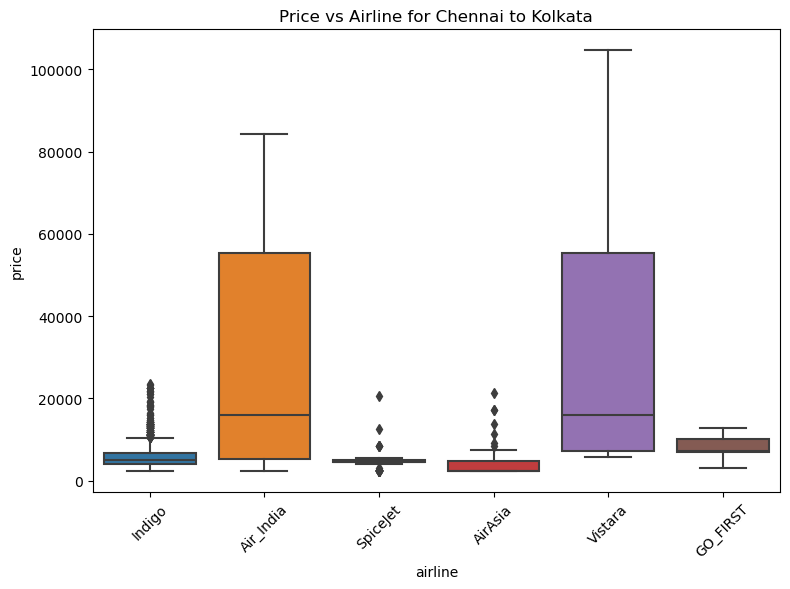

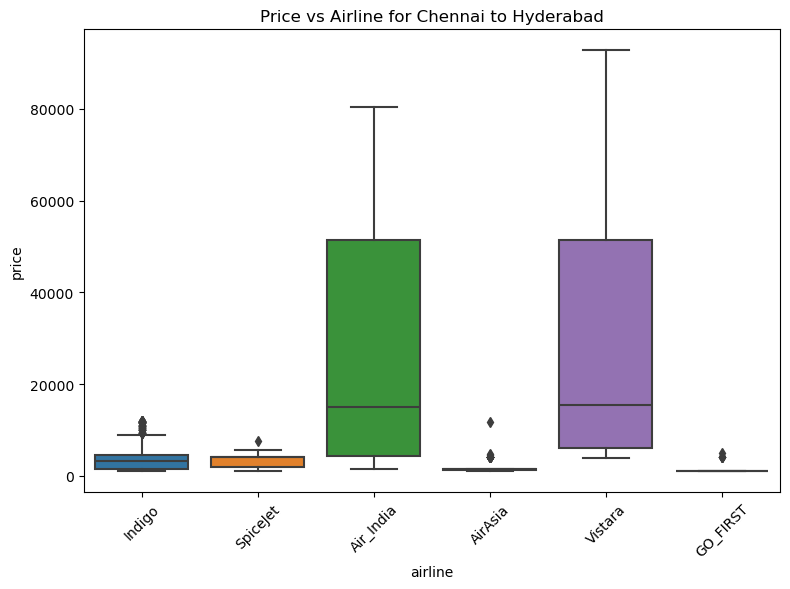

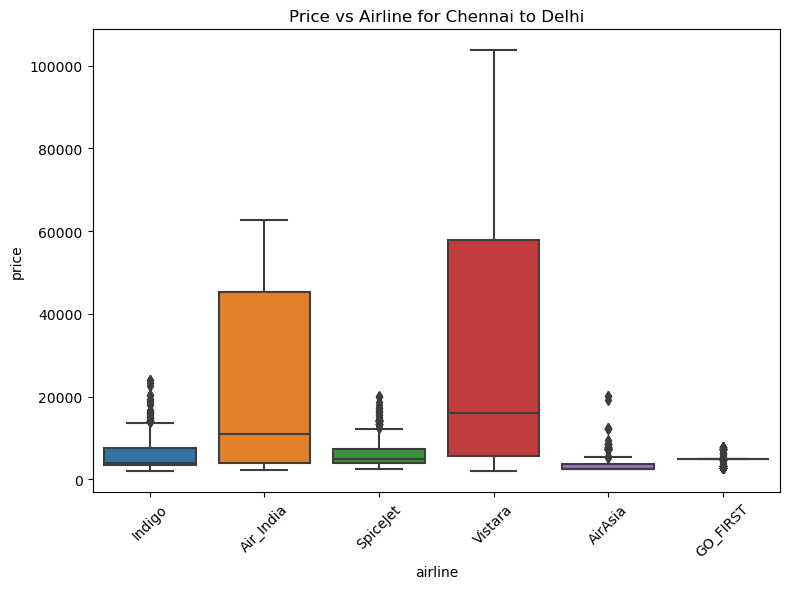

In [21]:
destination = df["destination_city"].unique()
source = df["source_city"].unique()



route_dfs = {}

for src in source: 
    for dst in destination:
        route_df = df[(df["source_city"] == src) & (df["destination_city"] == dst)]

        if not route_df.empty:

            route_dfs[f"{src}_to_{dst}"] = route_df

            plt.figure(figsize=(8,6))
            sns.boxplot(x='airline', y='price', data=route_df)
            plt.title(f"Price vs Airline for {src} to {dst}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()



Answering the first question "Does the price vary with Airlines for the same source_city to destination_city?" we can defintiely see that
the price does vary with airlines for the same srouce to destination. It actualy suggest that there may be an arbitrage for flight prices which one could exploit when traveling to these different areas. However it could also suggest that other factors are at play such as the number of planes that each ariline has to foster lower prices, or even the model/type of plane being used and whether it has inflight entertainment or not.

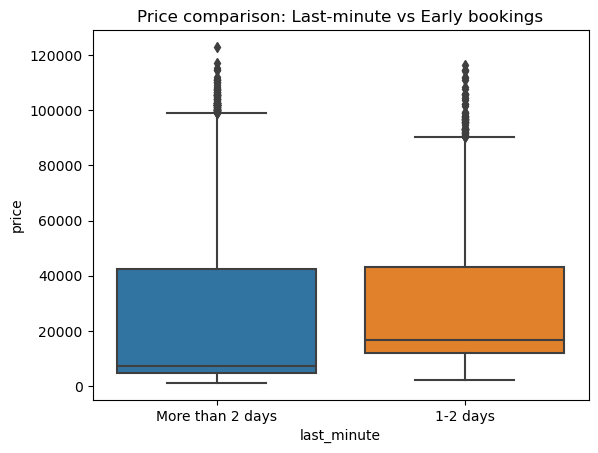

last_minute
False    20757.498484
True     27421.169326
Name: price, dtype: float64


In [23]:
df["last_minute"] = df["days_left"] <= 2

sns.boxplot(x="last_minute", y="price", data=df)
plt.title('Price comparison: Last-minute vs Early bookings')
plt.xticks([0,1], ["More than 2 days", "1-2 days"])
plt.show()

print(df.groupby('last_minute')['price'].mean())


On average we can say that prices on last minutes tickets are higher. The spread seems more concentrated with the last minut and higher in price compared to tickets bought at reasonable times

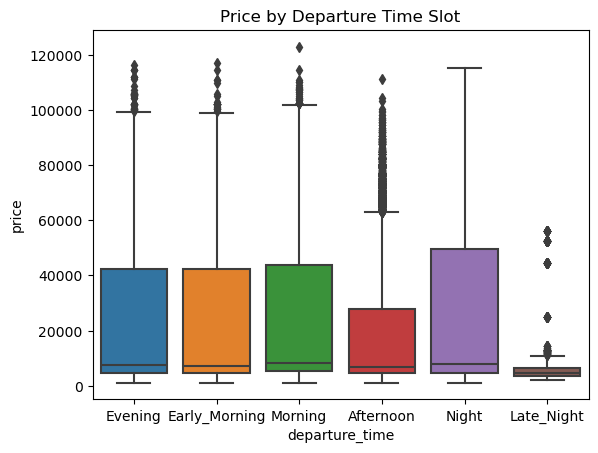

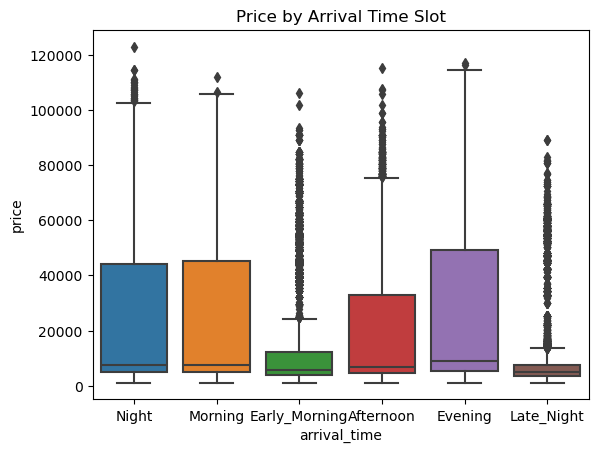

<function seaborn.categorical.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

In [25]:
df['departure_time']
df['arrival_time'].unique()

sns.boxplot(x="departure_time", y="price", data=df)
plt.title("Price by Departure Time Slot")
plt.show()

sns.boxplot(x="arrival_time", y="price", data=df)
plt.title("Price by Arrival Time Slot")
plt.show()


sns.boxplot

Based on the boxplots, flight ticket prices do appear to vary by both departure and arrival time slots. Afternoon and Late Night departures have lower median prices, suggesting they are more budget friendly. On the other hand, Night and Evening departures have higher price variability and medians. Similarly, flights arriving in the Early Morning and Late Night are generally cheaper than those arriving in the Evening or Night. 

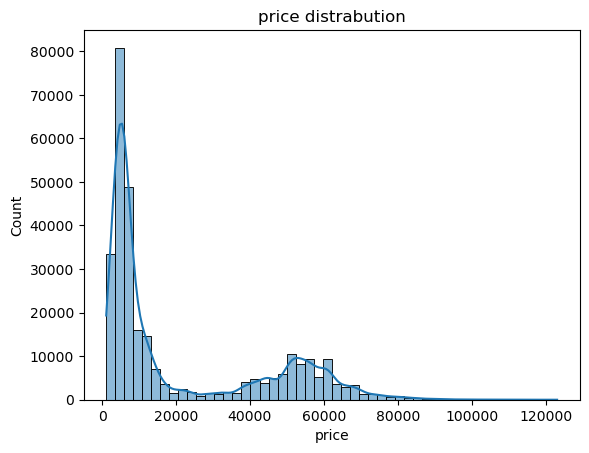

Original dataset size: 300153
Cleaned dataset size: 300030


In [27]:
sns.histplot(df["price"], bins=50, kde=True)
plt.title('price distrabution')
plt.show()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75) 
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df_clean = df[(df["price"] >= lower) & (df['price'] <= upper)]
df_clean.columns

print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_clean.shape[0]}")

In [32]:
#Price being the target variable
x = df_clean.drop(columns='price')
y = df_clean['price']

X_encode = pd.get_dummies(x, drop_first=True)
X_encode = X_encode.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size=0.2, random_state=69)


In [ ]:
lr_m1 = sm.OLS(y_train, X_train).fit() 

In [54]:
print(lr_m1.params)

AttributeError: 'function' object has no attribute 'params'